<h1> Mass Spec Signal Analysis </h1>

### How to use this app

This is a Jupyter Notebook. Blocks of python code are displayed with output below. Here, the output contains widgets you'll use to analyze data.

* [Box 1] Choose the folder that contains your data files (Don't choose the actual files - This program will get all the files in the folder). all files in the folder must be data files (csv formatted text documents - .txt is fine just make sure the format is right.)
* [Box 2] Once you choose a file, you have to click the code above box 2. Then hit the run button on the toolbar above. Then, if you want to run a preview of your dataset hit the "Load Preview" button.
* [Box 3] Input your desired AMU's and background scan # range. Hit "run" to run the data analysis (This may take awhile!)

In [1]:
from ipyfilechooser import FileChooser
import ipywidgets as widgets
from IPython.core.display import display, HTML
import os

DEFAULT_PATH = "Z:\\"

display(HTML("<h3>Box 1 - Choose a file:</h3>"))

# Create and display a FileChooser widget
fc = FileChooser()
fc.default_path = DEFAULT_PATH
fc.default_filename = " "
display(fc)


FileChooser(path='Z:', filename=' ', show_hidden='False')

Button(description='Load Preview', style=ButtonStyle())

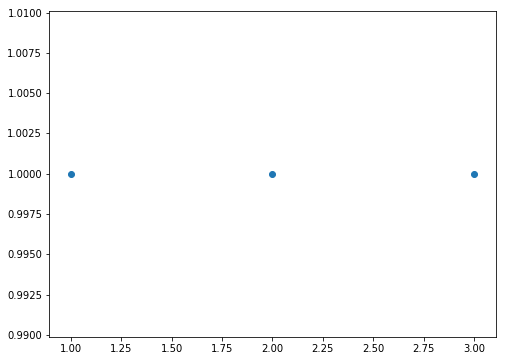

Please Wait


199,30,80


Dropdown(description='AMU:', options=(30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, …

In [38]:
import data
import matplotlib.pyplot as plt

display(HTML("<h3>Box 2 - Preview Data</h3>"))
prev_but = widgets.Button(description = "Load Preview")

out = widgets.Output(layout={'border': '1px solid black'})
with out:
    prev_fig = plt.figure(figsize=(8,6))
    prev_ax = prev_fig.add_subplot(111)
    prev_ax.scatter([1,2,3], [1,1,1])

folder = fc.selected_path
def load_preview(prev_but, ax):
    print("Please Wait")
    fname = os.listdir(folder)[0]
    path = folder+"//"+fname
    table = data.read_extrel(path)
    
    display(HTML(
    """
    <table>
        <thead>
            <th> # of Scans </th>
            <th> Min AMU </th>
            <th> Max AMU </th>
        </thead>
        <tbody>
            <tr> 
                <td> {} </td>
                <td> {} </td>
                <td> {} </td>
            </tr>
        </tbody>
    </table>
    """.format(len(table.iloc[1]), min(table.index), max(table.index))
    ))
    preview_select(table, ax)

def preview_select(data, ax):
    amuselect = widgets.Dropdown(description="AMU:", options=data.index)
    viz = lambda widg: preview_viz(widg, amuselect, data, ax)
    display(amuselect)
    amuselect.observe(viz, names="value")

def preview_viz(widg, amuselect, data, ax):
        #plot a preview
    with out:
        clear_output(True)
        amu = int(amuselect.value)
        preview_row = data.loc[amu]
        x = range(len(preview_row))
        ax.scatter(x, preview_row, s=20, c='red')
        ax.set_xlabel("Scan #")
        ax.set_ylabel("Intensity")
        ax.set_title("amu={}: preview".format(amu))
        prev_fig.canvas.draw()
        show()


display(prev_but)
viz_select = lambda b: load_preview(b, prev_ax)
prev_but.on_click(viz_select)

In [3]:
display(HTML("<h3>Box 3 - Analysis Input</h3>"))

amus = widgets.Text(description="AMU's", value="78")
bg_start = widgets.Text(description="Start", value="0")
bg_end = widgets.Text(description="End", value="75")

display(HTML("Mass Peaks to integrate (Comma Separated, no spaces):"))
display(amus)
display(HTML("Background Range(Scan #'s'):"))
display(bg_start)
display(bg_end)



Text(value='78', description="AMU's")

Text(value='0', description='Start')

Text(value='75', description='End')

In [15]:
run = widgets.Button(description="Run")

def run_analysis(btn):
    #get the input data
    amulist = amus.value.split(',')
    if amulist[-1]=="":
        del amulist[-1]
    for i in range(len(amulist)):
        amulist[i] = int(amulist[i])
        
    bgs = int(bg_start.value)
    bge = int(bg_end.value)
    results = data.analyze(folder, bgs, bge, amulist)
    print(results)
    return results

run.on_click(run_analysis)
display(run)

Button(description='Run', style=ButtonStyle())

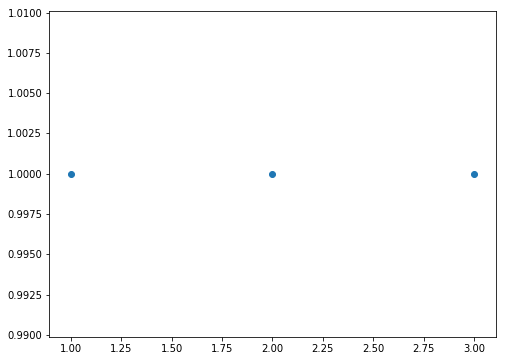

In [26]:

myplt = plt.figure(figsize=(8,6))
myax = myplt.add_subplot(111)
myax.scatter([1,2,3], [1, 1, 1])


